In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload

# reload from external changes

import datasets
datasets = reload(datasets)
from datasets import *

import ml_util
ml_util = reload(ml_util)
from ml_util import *

import cnn
cnn = reload(cnn)
from cnn import *

import gan
gan = reload(gan)
from gan import *

import adversarial_generation
adversarial_generation = reload(adversarial_generation)
from adversarial_generation import *

import evaluation_util
evaluation_util = reload(evaluation_util)
from evaluation_util import EvaluationUtil

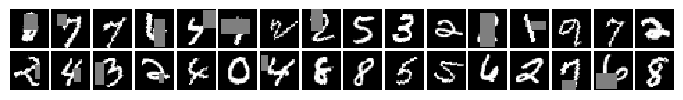

In [2]:
ds = MNISTData()
# get some random training images
images, _ = next(iter(ds.get_train_loader()))
Util.imshow_tensors(images, nrow=16)

In [4]:
filenames = "oneepoch plain conventional robust both".split(" ")
def load_classifier(weights_filename: str):
    c = Trainer("mnist", ds.get_train_loader, ds.get_test_loader)
    c.restore_params_from_disk(weights_filename)
    return c
classifiers = [load_classifier(f"new_classifiers/{filename}_MNIST.bin") for filename in filenames]

mnist classifier: 23394 trainable parameters
mnist classifier: 23394 trainable parameters
mnist classifier: 23394 trainable parameters
mnist classifier: 23394 trainable parameters
mnist classifier: 23394 trainable parameters


### A few predictions

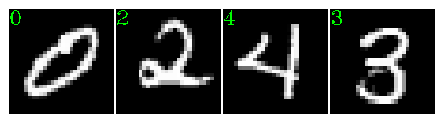

Predicted 0: ['0', '2', '4', '3']
Predicted 1: ['0', '2', '4', '3']
Predicted 2: ['0', '2', '4', '3']
Predicted 3: ['0', '2', '4', '3']
Predicted 4: ['0', '2', '4', '3']


In [5]:
EvaluationUtil.show_some_predictions(classifiers, ds)

### Evaluation: accuracy on the validation set

In [25]:
EvaluationUtil.evaluate_accuracy(classifiers, ds, 100)

Accuracy of classifier 0 on 100 validation images (noise 0.0): 100.00%
Accuracy of classifier 0 on 100 validation images (noise 0.8):  84.00%
Accuracy of classifier 1 on 100 validation images (noise 0.0):  98.00%
Accuracy of classifier 1 on 100 validation images (noise 0.8):  77.00%
Accuracy of classifier 2 on 100 validation images (noise 0.0):  99.00%
Accuracy of classifier 2 on 100 validation images (noise 0.8):  90.00%
Accuracy of classifier 3 on 100 validation images (noise 0.0):  98.00%
Accuracy of classifier 3 on 100 validation images (noise 0.8):  98.00%
Accuracy of classifier 4 on 100 validation images (noise 0.0):  99.00%
Accuracy of classifier 4 on 100 validation images (noise 0.8):  97.00%


### Evaluation: conventional robustness on the validation set

In [26]:
EvaluationUtil.evaluate_conventional_robustness(classifiers, ds, 4, l_2_bounds=[0.1, 0.15], l_inf_bounds=[0.15, 0.25])

For classifier 0, (scaled_l_2) ║Δx║ ≤ 0.100000, accuracy on 4 images =  50.00%
For classifier 1, (scaled_l_2) ║Δx║ ≤ 0.100000, accuracy on 4 images =  25.00%
For classifier 2, (scaled_l_2) ║Δx║ ≤ 0.100000, accuracy on 4 images =  50.00%
For classifier 3, (scaled_l_2) ║Δx║ ≤ 0.100000, accuracy on 4 images =  75.00%
For classifier 4, (scaled_l_2) ║Δx║ ≤ 0.100000, accuracy on 4 images =  75.00%
For classifier 0, (scaled_l_2) ║Δx║ ≤ 0.150000, accuracy on 4 images =  25.00%
For classifier 1, (scaled_l_2) ║Δx║ ≤ 0.150000, accuracy on 4 images =   0.00%
For classifier 2, (scaled_l_2) ║Δx║ ≤ 0.150000, accuracy on 4 images =   0.00%
For classifier 3, (scaled_l_2) ║Δx║ ≤ 0.150000, accuracy on 4 images =  25.00%
For classifier 4, (scaled_l_2) ║Δx║ ≤ 0.150000, accuracy on 4 images = 100.00%
For classifier 0, (     l_inf) ║Δx║ ≤ 0.150000, accuracy on 4 images =  75.00%
For classifier 1, (     l_inf) ║Δx║ ≤ 0.150000, accuracy on 4 images =  50.00%
For classifier 2, (     l_inf) ║Δx║ ≤ 0.150000, accu

In [27]:
EvaluationUtil.evaluate_conventional_adversarial_severity(classifiers, ds, 4, MNIST_L2_UPPER_BOUND, MNIST_LINF_UPPER_BOUND)

Adversarial severity of classifier 0 with scaled_l_2 norm = 0.10342982 (std = 0.02759050, #images = 4)
Adversarial severity of classifier 1 with scaled_l_2 norm = 0.07538490 (std = 0.05174246, #images = 4)
Adversarial severity of classifier 2 with scaled_l_2 norm = 0.11240512 (std = 0.05969995, #images = 4)
Adversarial severity of classifier 3 with scaled_l_2 norm = 0.14955950 (std = 0.03849006, #images = 4)
Adversarial severity of classifier 4 with scaled_l_2 norm = 0.18197638 (std = 0.08554783, #images = 4)
Adversarial severity of classifier 0 with      l_inf norm = 0.23405780 (std = 0.08004500, #images = 4)
Adversarial severity of classifier 1 with      l_inf norm = 0.27517456 (std = 0.04642991, #images = 4)
Adversarial severity of classifier 2 with      l_inf norm = 0.17445636 (std = 0.10593329, #images = 4)
Adversarial severity of classifier 3 with      l_inf norm = 0.27933425 (std = 0.21014406, #images = 4)
Adversarial severity of classifier 4 with      l_inf norm = 0.53407419 (s

### Evaluation: optimize class activations

classifier 0:


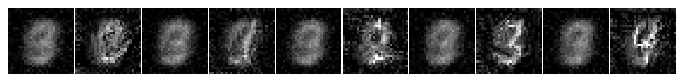

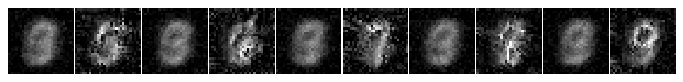

classifier 1:


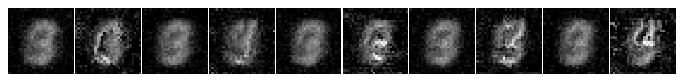

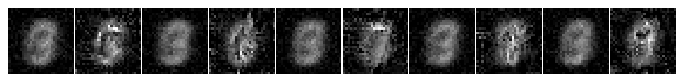

classifier 2:


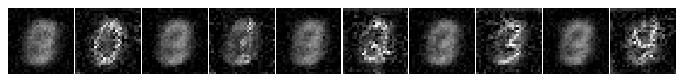

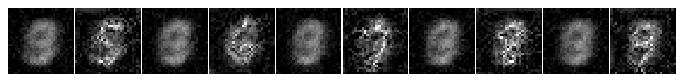

classifier 3:


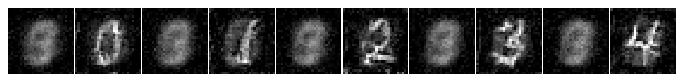

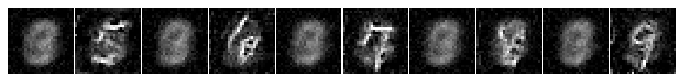

classifier 4:


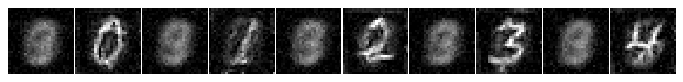

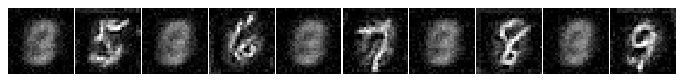

In [23]:
EvaluationUtil.generate_images_with_classifier(classifiers, ds, 10, 0.1, "scaled_l_2", 0.3, pairs_in_line=5, nrow=10)

### Train GANs for specific classes

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


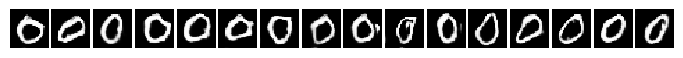

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


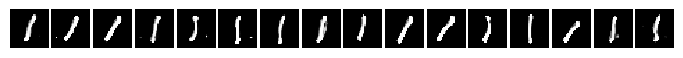

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


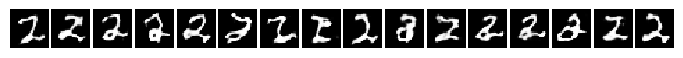

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


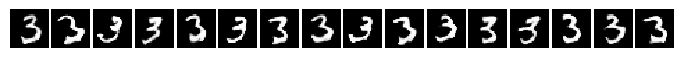

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


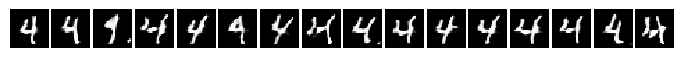

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


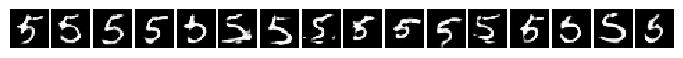

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


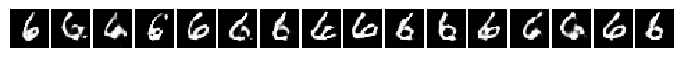

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


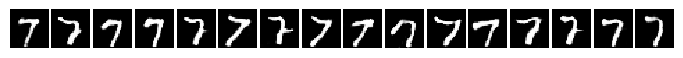

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


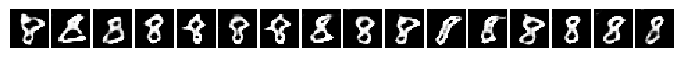

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


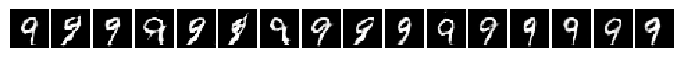

In [13]:
train = False

for class_id in range(10):
    filename = f"mnist-gan/dumped_weights_{class_id}.bin"
    loader = Util.class_specific_loader(class_id, ds.get_unaugmented_train_loader)
    g = GAN()
    if train:
        g.fit(loader, epochs=100, lr=1e-3, n_critic=5)
        g.save_params_to_disk(filename)
    else:
        g.restore_params_from_disk(filename)
        #g.warm_spectral_norms(loader)
    images = g.generate(16)
    Util.imshow_tensors(images, nrow=len(images))

### See reconstructed and generated images using the interface of GenerativeModel

generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters
generator: 42051 trainable parameters
discriminator: 41221 trainable parameters


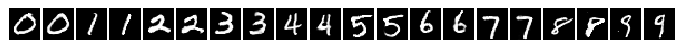

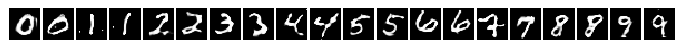

In [22]:
from generative import WGAN
reconstructed_images, generated_images = [], []
for class_id in range(10):
    gm = WGAN(ds, class_id, ds)
    img, _ = next(gm.get_sampler())
    reconstructed_images += [img, gm.decode(gm.encode(img))]
    generated_images += [gm.generate(), gm.generate()]
Util.imshow_tensors(*reconstructed_images, nrow=20)
Util.imshow_tensors(*generated_images, nrow=20)